PREPROCESSING STEPS
1. Deriv2
2. RNV
3. SavGol
4. PoissonScalling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter

In [112]:
import pandas as pd
import os

# Using double backslashes or raw string
file_path = r'C:\Users\Abdul\OneDrive - Chulalongkorn University\Data Basah\20240430_databasah_csv.csv'
data = pd.read_csv(file_path)
data.head()

C:\Users\Abdul\AppData\Local\Temp\ipykernel_11560\1770865426.py:6: DtypeWarning: Columns (3367,3369) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,Datapoints,3225.795591,3226.297348,3226.799261,3227.30133,3227.803556,3228.305938,3228.808476,3229.311171,3229.814022,...,countrycode,countrytarget,provincecode,yymm,yy,mm,ftirrun_yyyy,ftirrun_mmm,ftirrun_m,ftirrun_yymm
0,absorbance_Fri Mar 08 10_46_59 2024_TH-CPN-005...,0.004393,0.004496,0.004647,0.004797,0.004890,0.004878,0.004733,0.004461,0.004096,...,TH,0,CPN,2311,23,11,2024,Mar,3,2403
1,absorbance_Fri Mar 08 10_49_06 2024_TH-CPN-005...,0.004996,0.005020,0.005068,0.005098,0.005065,0.004930,0.004673,0.004306,0.003863,...,TH,0,CPN,2311,23,11,2024,Mar,3,2403
2,absorbance_Fri Mar 08 10_50_57 2024_TH-CPN-005...,0.003594,0.003403,0.003151,0.002869,0.002573,0.002268,0.001962,0.001675,0.001440,...,TH,0,CPN,2311,23,11,2024,Mar,3,2403
3,absorbance_Fri Mar 08 10_51_30 2024_TH-CPN-005...,0.004154,0.004115,0.003974,0.003771,0.003545,0.003316,0.003093,0.002885,0.002702,...,TH,0,CPN,2311,23,11,2024,Mar,3,2403
4,absorbance_Fri Mar 08 10_52_01 2024_TH-CPN-005...,0.004019,0.003930,0.003819,0.003692,0.003547,0.003379,0.003192,0.002997,0.002818,...,TH,0,CPN,2311,23,11,2024,Mar,3,2403


In [113]:
#Buat data baru tanpa kolom yang tidak diperlukan aka numerical data
data_new = data.drop(['countrycode','provincecode', 'ftirrun_mmm','samplecode','Datapoints'], axis=1)
data_new.head(11)

,3225.795591,3226.297348,3226.799261,3227.30133,3227.803556,3228.305938,3228.808476,3229.311171,3229.814022,3230.31703,...,15364.34379,15375.73322,15387.13955,countrytarget,yymm,yy,mm,ftirrun_yyyy,ftirrun_m,ftirrun_yymm
0,0.004393,0.004496,0.004647,0.004797,0.004890,0.004878,0.004733,0.004461,0.004096,0.003698,...,0.023575,0.022735,0.021611,0,2311,23,11,2024,3,2403
1,0.004996,0.005020,0.005068,0.005098,0.005065,0.004930,0.004673,0.004306,0.003863,0.003403,...,0.023180,0.023461,0.023297,0,2311,23,11,2024,3,2403
2,0.003594,0.003403,0.003151,0.002869,0.002573,0.002268,0.001962,0.001675,0.001440,0.001306,...,0.019312,0.017765,0.016203,0,2311,23,11,2024,3,2403
3,0.004154,0.004115,0.003974,0.003771,0.003545,0.003316,0.003093,0.002885,0.002702,0.002565,...,0.018057,0.017335,0.016211,0,2311,23,11,2024,3,2403
4,0.004019,0.003930,0.003819,0.003692,0.003547,0.003379,0.003192,0.002997,0.002818,0.002683,...,0.017539,0.016355,0.014635,0,2311,23,11,2024,3,2403
5,0.005993,0.005933,0.005833,0.005723,0.005619,0.005523,0.005431,0.005343,0.005266,0.005213,...,0.018037,0.016367,0.014480,0,2311,23,11,2024,3,2403
6,0.006667,0.006721,0.006703,0.006618,0.006476,0.006285,0.006056,0.005807,0.005559,0.005343,...,0.017852,0.017513,0.017265,0,2311,23,11,2024,3,2403
7,0.004406,0.004646,0.004836,0.004944,0.004959,0.004896,0.004786,0.004672,0.004588,0.004557,...,0.019729,0.020514,0.021274,0,2311,23,11,2024,3,2403
8,0.004286,0.004460,0.004598,0.004684,0.004723,0.004737,0.004761,0.004831,0.004965,0.005167,...,0.019551,0.020008,0.020181,0,2311,23,11,2024,3,2403
9,0.002489,0.002486,0.002419,0.002281,0.002076,0.001816,0.001527,0.001242,0.001000,0.000841,...,0.011408,0.014629,0.018012,0,2311,23,11,2024,3,2403


In [114]:
#Deriv2
def second_derivative(data, spacing=1):

    data = np.asarray(data)
    second_deriv = (data[:-2] - 2 * data[1:-1] + data[2:]) / (spacing ** 2)
    second_deriv = np.pad(second_deriv, (1, 1), mode='edge')
    return second_deriv

#Data 
data_new = np.random.random((11, 3369))  # Replace with your actual data

# Compute the second derivative for each row
second_deriv_data_new = np.apply_along_axis(second_derivative, 1, data_new)

# Convert the result to a DataFrame
df_second_deriv_data_new = pd.DataFrame(second_deriv_data_new)

# Display the first few rows of the DataFrame
df_second_deriv_data_new.head(11)


,0,1,2,3,4,5,6,7,8,9,...,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368
0,-1.111474,-1.111474,-0.302621,1.084650,-1.347802,0.956329,-0.510146,1.008574,-1.525208,1.105375,...,-0.953528,0.223565,0.743135,-0.938398,0.441808,0.201048,0.247322,-1.227199,1.376963,1.376963
1,0.277139,0.277139,-1.317991,1.766735,-1.245113,0.393114,-0.258504,0.125288,0.219629,0.155550,...,-0.699633,0.307256,0.614933,-0.824792,0.541555,-0.584550,-0.051747,0.681246,-0.625901,-0.625901
2,0.347533,0.347533,-0.722168,0.809770,-0.278643,0.294270,0.151962,-0.778075,0.628292,-0.478227,...,-0.867664,1.711739,-1.657492,0.962705,-0.323596,0.389979,-0.182166,0.137613,-0.741053,-0.741053
3,-0.720362,-0.720362,0.793621,0.105739,-0.304459,-0.629040,1.102522,-1.360629,1.055216,-0.064090,...,-0.196413,-0.175256,-0.872303,1.664002,-1.137684,0.419233,0.179601,-0.390593,0.411704,0.411704
4,0.425120,0.425120,-0.586113,0.968071,-0.944625,0.668981,-0.639596,0.252967,0.319370,-0.423027,...,-1.034797,0.761493,-0.759894,-0.132532,1.311046,-1.259599,0.825513,-1.050657,0.681703,0.681703
5,0.018733,0.018733,-0.890022,1.437284,-1.098143,-0.089305,0.506309,-0.452172,0.676218,-0.740663,...,0.033731,-0.675002,-0.289481,1.349738,-0.972547,0.015067,0.241371,-0.305776,0.098942,0.098942
6,-0.295047,-0.295047,-0.143646,0.771205,-0.303553,-0.355829,0.692367,-0.594003,0.503565,-0.861528,...,0.488653,-1.008240,1.068458,-1.306819,1.334740,-0.814495,-0.386904,1.129121,-0.665271,-0.665271
7,0.612522,0.612522,-0.771079,1.117798,-0.495877,-0.448203,1.116148,-1.061162,-0.268560,0.581575,...,-1.180732,-0.147999,0.519360,0.549240,-0.455937,-0.401590,0.597130,-0.958229,1.308911,1.308911
8,-1.467862,-1.467862,0.396362,-0.187210,1.054522,-1.339603,0.791434,0.391465,-1.359936,0.715402,...,-1.118362,0.688380,-0.414308,-0.328083,0.695736,-0.502425,0.489160,-0.544475,0.548875,0.548875
9,0.490213,0.490213,-0.150834,0.550242,-1.130325,0.914468,-0.648562,1.026837,-0.806211,-0.006909,...,-1.141532,0.953336,0.298114,-1.438477,1.837007,-1.107580,-0.060367,0.611599,-0.652749,-0.652749


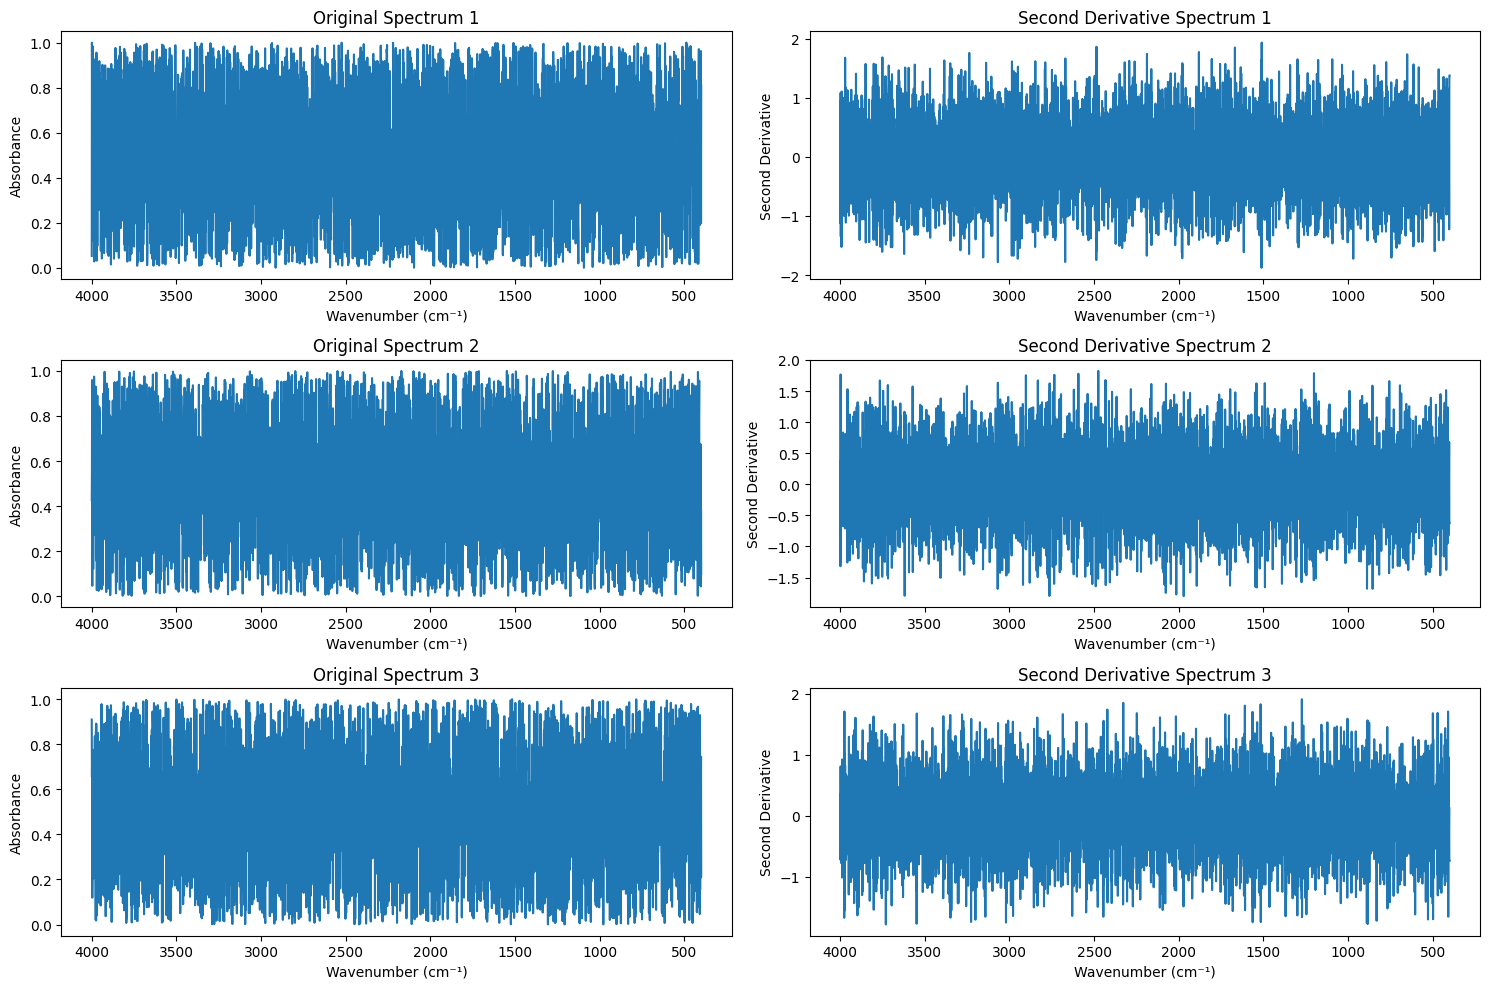

In [115]:
# Plot the original data and the second derivatives for the first few rows
num_plots = 3  # Number of spectra to plot

fig, axes = plt.subplots(num_plots, 2, figsize=(15, 10))

# Assuming wavenumbers range from 4000 to 400 cm-1 for an FTIR spectrum
wavenumbers = np.linspace(4000, 400, data_new.shape[1])

for i in range(num_plots):
    axes[i, 0].plot(wavenumbers, data_new[i])
    axes[i, 0].set_title(f'Original Spectrum {i+1}')
    axes[i, 0].set_xlabel('Wavenumber (cm⁻¹)')
    axes[i, 0].set_ylabel('Absorbance')
    axes[i, 0].invert_xaxis()  # FTIR spectra typically have a reversed x-axis
    
    axes[i, 1].plot(wavenumbers, second_deriv_data_new[i])
    axes[i, 1].set_title(f'Second Derivative Spectrum {i+1}')
    axes[i, 1].set_xlabel('Wavenumber (cm⁻¹)')
    axes[i, 1].set_ylabel('Second Derivative')
    axes[i, 1].invert_xaxis()  # FTIR spectra typically have a reversed x-axis

plt.tight_layout()
plt.show()

In [116]:
#RNV

def second_derivative(data, spacing=1):

    data = np.asarray(data)
    second_deriv = np.zeros_like(data)
    # Calculate the second derivative using central differences
    second_deriv[1:-1] = (data[:-2] - 2 * data[1:-1] + data[2:]) / (spacing ** 2)
    return second_deriv

def relative_normalization(data):
  
    max_values = np.max(data, axis=1, keepdims=True)
    normalized_data = data / max_values
    return normalized_data

# Example data
data_new = np.random.random((11, 3369))  # Replace with your actual data

# Compute the second derivative for each row
second_deriv_data_new = np.apply_along_axis(second_derivative, 1, data_new)

# Perform relative normalization (RNV)
rnv_data_new = relative_normalization(second_deriv_data_new)

# Convert the result to a DataFrame
df_rnv_data_new = pd.DataFrame(rnv_data_new)

# Display the first few rows of the DataFrame
df_rnv_data_new.head(16)


,0,1,2,3,4,5,6,7,8,9,...,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368
0,0.0,-0.671152,0.611054,-0.352004,0.006241,-0.168583,0.292279,-0.424213,0.563930,-0.439657,...,0.217089,-0.052810,-0.285572,0.506832,-0.436334,-0.164907,0.416866,-0.210567,0.096851,0.0
1,0.0,0.049603,-0.049682,-0.010772,0.131536,-0.153673,0.042820,-0.379486,0.416354,0.232404,...,-0.222589,0.388168,0.274634,-0.350525,-0.378830,0.629347,-0.299982,-0.173195,0.445424,0.0
2,0.0,-0.383591,0.196365,-0.291694,0.258424,-0.012201,-0.197400,-0.080253,0.323137,-0.278944,...,-0.421187,0.196693,0.179834,-0.240240,0.135125,-0.486529,0.742818,-0.378946,0.160054,0.0
3,0.0,0.049756,0.628475,-0.701359,0.042683,0.330443,0.104901,-0.373122,0.000185,0.108109,...,-0.009354,-0.654828,0.616855,-0.035788,-0.444819,0.773867,-0.463868,-0.357087,0.211179,0.0
4,0.0,0.250121,0.120145,-0.391921,0.038574,0.176256,-0.031689,0.079225,-0.037714,-0.036592,...,0.123865,0.478861,-0.470174,-0.230413,0.024435,0.397357,-0.380809,0.380349,-0.028931,0.0
5,0.0,0.254697,-0.577059,0.563768,-0.349234,0.162581,0.338475,-0.438731,-0.186843,0.266256,...,-0.010921,0.069740,-0.114430,-0.390403,0.729231,-0.769644,0.444671,-0.077398,0.215539,0.0
6,0.0,-0.344578,-0.225318,0.143065,0.414044,-0.581711,0.580300,-0.399772,-0.022610,-0.117226,...,0.366850,-0.503119,-0.156020,0.427230,-0.223887,0.056372,0.032723,0.123815,-0.487718,0.0
7,0.0,-0.662253,0.211927,0.070963,0.061703,-0.136734,0.007353,0.138517,-0.113374,-0.143623,...,0.609354,-0.540274,0.489033,-0.293746,0.016609,-0.017132,-0.118613,0.540536,-0.275319,0.0
8,0.0,0.084645,0.045170,-0.098643,0.088934,-0.477942,0.630473,-0.347531,0.054326,-0.239761,...,-0.042884,-0.320376,0.492106,-0.004337,-0.306998,0.125773,-0.477593,0.750627,-0.411681,0.0
9,0.0,0.141004,-0.467278,0.390552,0.037509,-0.053614,0.509199,-0.484461,0.033108,-0.246676,...,-0.759554,0.892821,-0.767753,0.273882,-0.156976,0.465700,-0.324903,0.091229,-0.005949,0.0


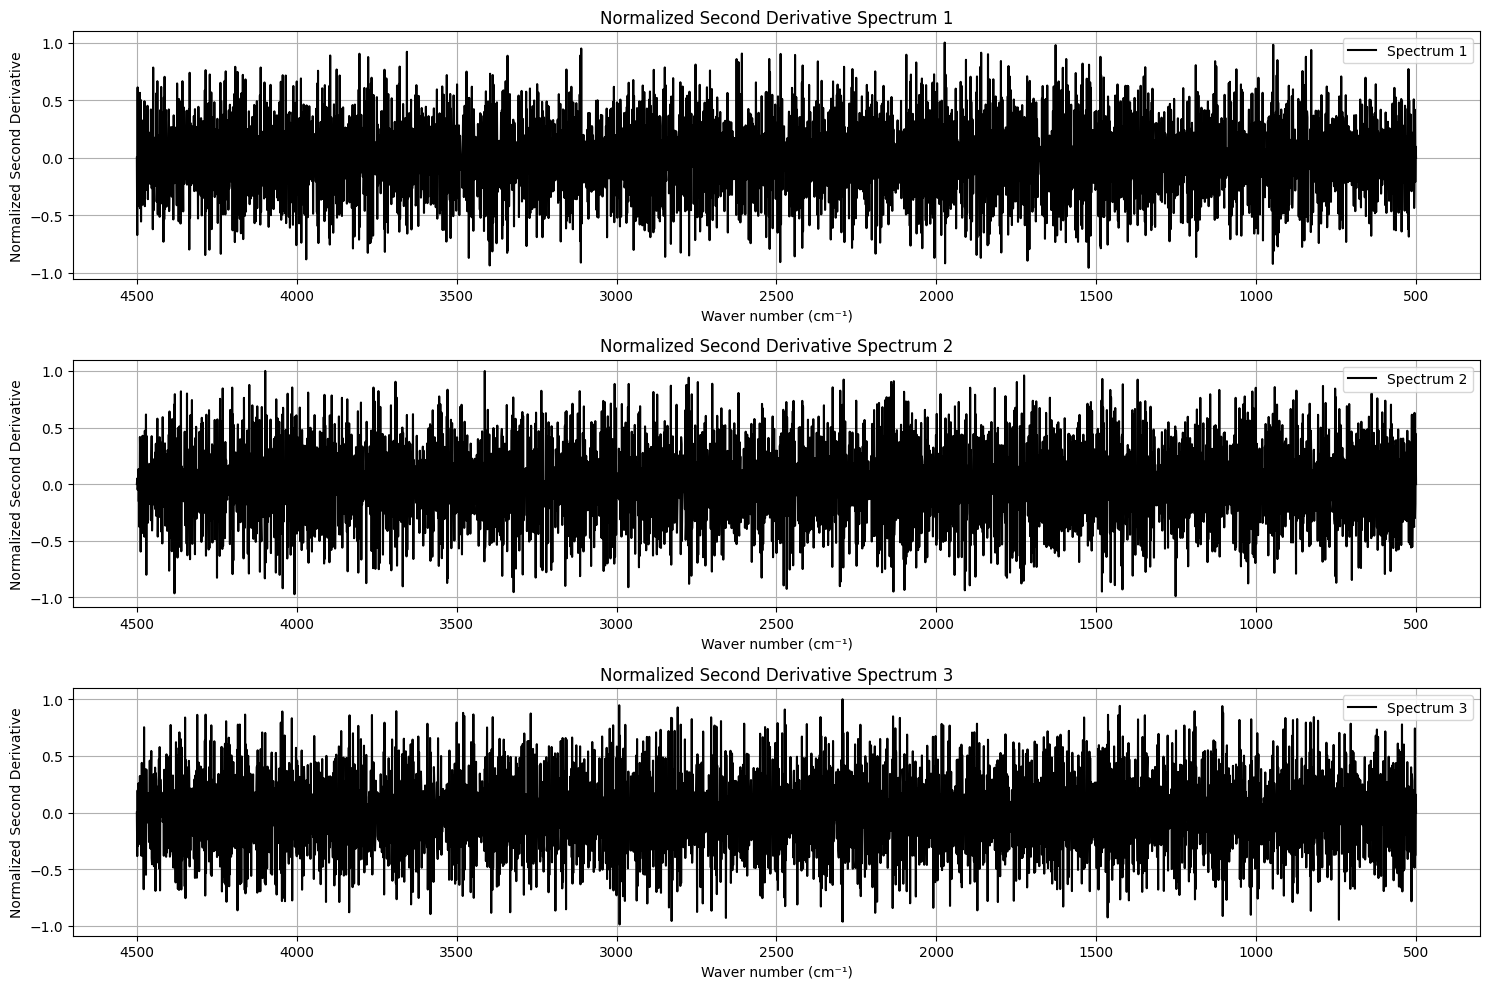

In [117]:
# Plot the normalized second derivative spectra for the first few rows
num_plots = 3  # Number of spectra to plot

fig, axes = plt.subplots(num_plots, 1, figsize=(15, 10))

# Assuming wavenumbers range from 4500 to 500 cm-1 for an FTIR spectrum
wavenumbers = np.linspace(4500, 500, df_rnv_data_new.shape[1])

for i in range(num_plots):
    axes[i].plot(wavenumbers, df_rnv_data_new.iloc[i], label=f'Spectrum {i+1}', color='black')
    axes[i].set_title(f'Normalized Second Derivative Spectrum {i+1}')
    axes[i].set_xlabel('Waver number (cm⁻¹)')
    axes[i].set_ylabel('Normalized Second Derivative')
    axes[i].invert_xaxis()  # FTIR spectra typically have a reversed x-axis
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()




In [118]:
#SavGol

def second_derivative(data, spacing=1):

    data = np.asarray(data)
    second_deriv = np.zeros_like(data)
    # Calculate the second derivative using central differences
    second_deriv[1:-1] = (data[:-2] - 2 * data[1:-1] + data[2:]) / (spacing ** 2)
    return second_deriv

def relative_normalization(data):
    max_values = np.max(data, axis=1, keepdims=True)
    normalized_data = data / max_values
    return normalized_data

def apply_savgol_filter(data, window_length=11, polyorder=3):
    
    smoothed_data = savgol_filter(data, window_length=window_length, polyorder=polyorder, axis=1)
    return smoothed_data

# Example data
data_new = np.random.random((11, 3369))  # Replace with your actual data

# Compute the second derivative for each row
second_deriv_data_new = np.apply_along_axis(second_derivative, 1, data_new)

# Perform relative normalization (RNV)
rnv_data_new = relative_normalization(second_deriv_data_new)

# Apply Savitzky-Golay filter
savgol_data_new = apply_savgol_filter(rnv_data_new, window_length=11, polyorder=3)

# Convert the result to a DataFrame
df_savgol_data_new = pd.DataFrame(savgol_data_new)

# Display the first few rows of the DataFrame
df_savgol_data_new.head(11)


,0,1,2,3,4,5,6,7,8,9,...,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368
0,0.014304,-0.048461,-0.061398,-0.040103,-0.000172,0.042796,0.019997,-0.026153,0.035074,-0.039221,...,0.045610,-0.075706,0.021504,-0.011910,0.057409,-0.000552,-0.060704,-0.102030,-0.103518,-0.044153
1,0.241200,0.078726,-0.006188,-0.032463,-0.019021,0.015217,-0.033534,0.053215,-0.091983,0.097930,...,-0.009949,0.052845,0.014275,0.009610,0.061612,-0.004686,-0.061852,-0.084931,-0.048969,0.070988
2,-0.136360,-0.106357,-0.068556,-0.028556,0.008048,0.035661,0.036549,-0.005798,0.029049,-0.102491,...,0.012900,-0.029392,-0.014905,0.060036,-0.049097,0.008707,0.057291,0.071234,0.025115,-0.106486
3,-0.019606,0.013766,0.030508,0.033516,0.025686,0.009914,-0.061142,0.012438,0.007497,0.039155,...,0.071157,-0.035664,-0.009752,-0.054522,0.013184,-0.002578,-0.003846,0.023116,0.092043,0.216670
4,-0.002911,-0.043773,-0.052465,-0.039345,-0.014770,0.010902,-0.053173,0.042603,-0.070396,0.072034,...,-0.006942,0.081003,-0.008739,-0.062840,0.026429,-0.023338,-0.061658,-0.066531,-0.015957,0.112063
5,-0.023191,-0.035833,-0.037240,-0.030373,-0.018194,-0.003667,0.050000,-0.092266,0.015727,0.032649,...,-0.001495,-0.054029,0.004415,0.029763,0.015507,0.057577,0.079900,0.064115,-0.008138,-0.155220
6,0.061691,0.047589,0.035258,0.024125,0.013615,0.003156,-0.062132,0.048272,-0.059208,0.002609,...,-0.053933,-0.019433,0.016054,-0.028721,0.033656,-0.008438,-0.048044,-0.068812,-0.054389,0.011578
7,-0.011786,0.025763,0.027935,0.007479,-0.022850,-0.050303,0.041082,-0.000434,0.058527,-0.046247,...,0.011132,0.013663,-0.077592,0.084642,0.026264,0.016558,0.006956,-0.000628,-0.004280,-0.002083
8,-0.161508,-0.061017,-0.009759,0.005551,-0.001805,-0.018542,0.045699,0.005902,0.072583,-0.062199,...,-0.065513,0.042903,-0.063681,0.021857,0.009550,0.038943,0.064394,0.078286,0.073005,0.040934
9,-0.184051,-0.051756,0.006364,0.011327,-0.015848,-0.054142,0.028372,0.028849,-0.003946,-0.036879,...,-0.011569,0.044025,0.017608,0.012013,-0.000579,-0.010051,-0.023387,-0.041474,-0.065201,-0.095456


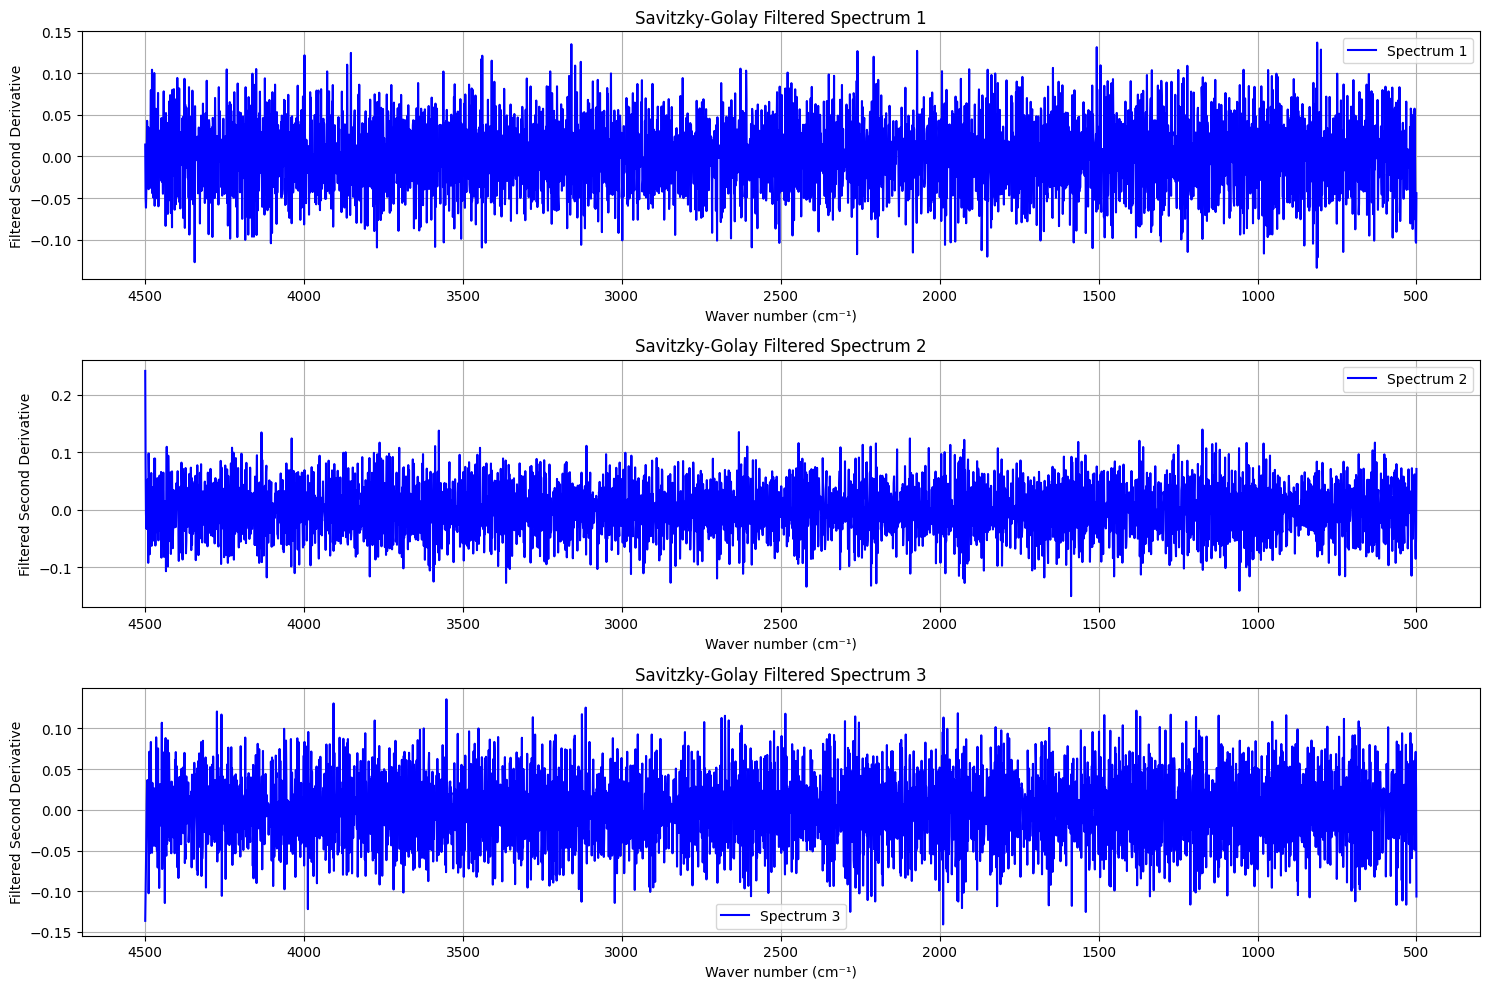

In [119]:
# Plot the Savitzky-Golay filtered spectra for the first few rows with blue color
num_plots = 3  # Number of spectra to plot

fig, axes = plt.subplots(num_plots, 1, figsize=(15, 10))

# Assuming wavenumbers range from 4500 to 500 cm-1 for an FTIR spectrum
wavenumbers = np.linspace(4500, 500, df_savgol_data_new.shape[1])

for i in range(num_plots):
    axes[i].plot(wavenumbers, df_savgol_data_new.iloc[i], label=f'Spectrum {i+1}', color='blue')
    axes[i].set_title(f'Savitzky-Golay Filtered Spectrum {i+1}')
    axes[i].set_xlabel('Waver number (cm⁻¹)')
    axes[i].set_ylabel('Filtered Second Derivative')
    axes[i].invert_xaxis()  # FTIR spectra typically have a reversed x-axis
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [120]:
#PoissonScalling
def second_derivative(data, spacing=1):
    data = np.asarray(data)
    second_deriv = np.zeros_like(data)
    # Calculate the second derivative using central differences
    second_deriv[1:-1] = (data[:-2] - 2 * data[1:-1] + data[2:]) / (spacing ** 2)
    return second_deriv

def relative_normalization(data):
    max_values = np.max(data, axis=1, keepdims=True)
    normalized_data = data / max_values
    return normalized_data

def apply_savgol_filter(data, window_length=11, polyorder=3):

    smoothed_data = savgol_filter(data, window_length=window_length, polyorder=polyorder, axis=1)
    return smoothed_data

def poisson_scaling(data):

    scaled_data = np.sqrt(data)
    return scaled_data

# Example data
data_new = np.random.random((11, 3369))  # Replace with your actual data

# Compute the second derivative for each row
second_deriv_data_new = np.apply_along_axis(second_derivative, 1, data_new)

# Perform relative normalization (RNV)
rnv_data_new = relative_normalization(second_deriv_data_new)

# Apply Savitzky-Golay filter
savgol_data_new = apply_savgol_filter(rnv_data_new, window_length=11, polyorder=3)

# Apply Poisson scaling
poisson_scaled_data_new = poisson_scaling(savgol_data_new)

# Convert the result to a DataFrame
df_poisson_scaled_data_new = pd.DataFrame(poisson_scaled_data_new)

# Display the first few rows of the DataFrame
df_poisson_scaled_data_new.head(11)


C:\Users\Abdul\AppData\Local\Temp\ipykernel_11560\1798678803.py:20: RuntimeWarning: invalid value encountered in sqrt
  scaled_data = np.sqrt(data)


,0,1,2,3,4,5,6,7,8,9,...,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368
0,0.113932,NaN,NaN,NaN,NaN,0.213595,0.204479,0.220004,NaN,0.205004,...,0.152921,0.061155,0.127877,NaN,NaN,0.170568,0.246190,0.290590,0.307348,0.290758
1,NaN,NaN,0.126524,0.140095,NaN,NaN,0.164976,0.088085,0.149113,0.086031,...,NaN,0.051484,NaN,0.167840,0.119320,0.123346,0.113472,0.084749,NaN,NaN
2,NaN,NaN,NaN,NaN,0.132050,0.215027,0.115831,0.190136,NaN,NaN,...,NaN,0.078348,0.111725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.348397,0.280468,0.222508,0.176591,0.144729,0.126718,0.064607,NaN,0.139061,0.186292,...,NaN,0.018153,NaN,0.152560,0.221640,NaN,NaN,NaN,NaN,NaN
4,0.169165,NaN,NaN,NaN,NaN,0.256888,NaN,NaN,0.325886,NaN,...,NaN,0.072886,0.142037,NaN,NaN,NaN,NaN,0.057152,0.107513,0.127978
5,NaN,NaN,0.142930,0.197142,0.062851,NaN,0.329662,NaN,0.130455,NaN,...,NaN,0.226170,NaN,0.291254,NaN,NaN,NaN,NaN,NaN,NaN
6,0.246357,0.234840,0.219996,0.200834,0.175661,0.140935,NaN,0.098353,NaN,0.220419,...,NaN,0.191480,NaN,0.112838,0.065959,NaN,NaN,NaN,0.087315,0.206413
7,0.259634,0.239636,0.202272,0.147253,0.059518,NaN,0.180855,NaN,0.208609,0.199498,...,0.309906,NaN,0.066138,NaN,NaN,0.078349,0.276448,0.337081,0.300596,NaN
8,0.193989,NaN,NaN,NaN,NaN,0.144997,0.130878,0.232607,NaN,NaN,...,0.275034,NaN,NaN,NaN,0.255314,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,0.042610,0.149855,NaN,NaN,0.186284,NaN,...,0.102185,0.166388,0.082582,0.208331,0.053918,NaN,NaN,NaN,NaN,NaN


In [121]:
df_poisson_scaled_data_new.isnull().sum()

0       4
1       8
2       6
3       6
4       5
       ..
3364    8
3365    8
3366    7
3367    7
3368    8
Length: 3369, dtype: int64

C:\Users\Abdul\AppData\Local\Temp\ipykernel_11560\4064120981.py:27: RuntimeWarning: invalid value encountered in sqrt
  scaled_data = np.sqrt(data)


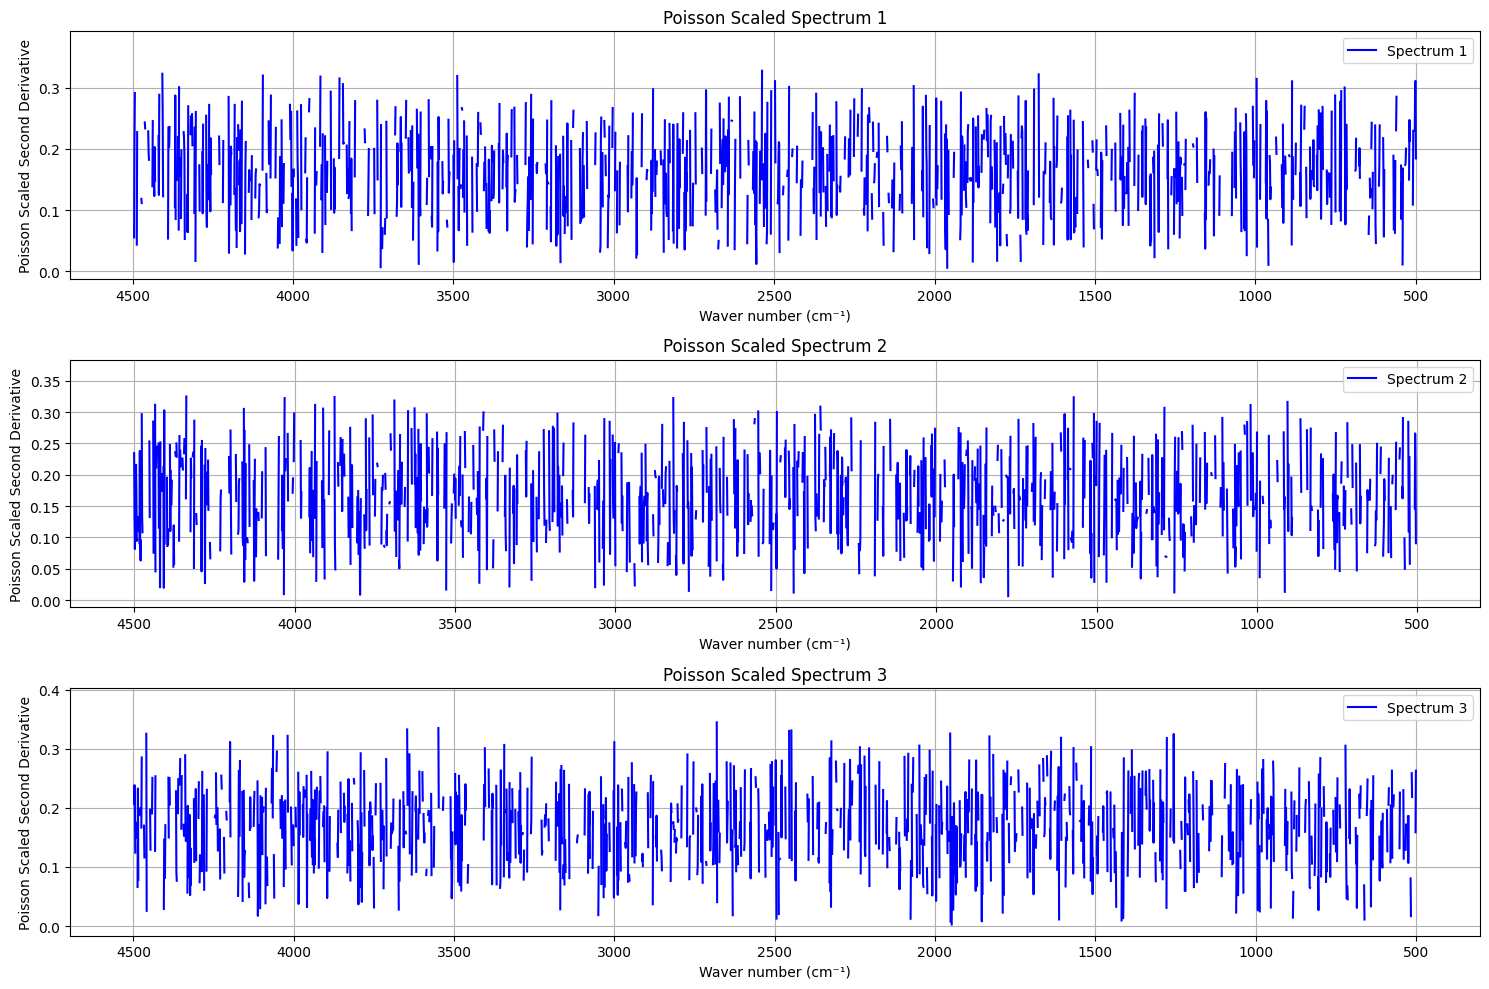

In [122]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

def second_derivative(data, spacing=1):
  
    data = np.asarray(data)
    second_deriv = np.zeros_like(data)
    # Calculate the second derivative using central differences
    second_deriv[1:-1] = (data[:-2] - 2 * data[1:-1] + data[2:]) / (spacing ** 2)
    return second_deriv

def relative_normalization(data):

    max_values = np.max(data, axis=1, keepdims=True)
    normalized_data = data / max_values
    return normalized_data

def apply_savgol_filter(data, window_length=11, polyorder=3):

    smoothed_data = savgol_filter(data, window_length=window_length, polyorder=polyorder, axis=1)
    return smoothed_data

def poisson_scaling(data):

    scaled_data = np.sqrt(data)
    return scaled_data

# Example data
data_new = np.random.random((11, 3369))  # Replace with your actual data

# Compute the second derivative for each row
second_deriv_data_new = np.apply_along_axis(second_derivative, 1, data_new)

# Perform relative normalization (RNV)
rnv_data_new = relative_normalization(second_deriv_data_new)

# Apply Savitzky-Golay filter
savgol_data_new = apply_savgol_filter(rnv_data_new, window_length=11, polyorder=3)

# Apply Poisson scaling
poisson_scaled_data_new = poisson_scaling(savgol_data_new)

# Convert the result to a DataFrame
df_poisson_scaled_data_new = pd.DataFrame(poisson_scaled_data_new)

# Plot the Poisson scaled spectra for the first few rows
num_plots = 3  # Number of spectra to plot

fig, axes = plt.subplots(num_plots, 1, figsize=(15, 10))

# Assuming wavenumbers range from 4500 to 500 cm-1 for an FTIR spectrum
wavenumbers = np.linspace(4500, 500, df_poisson_scaled_data_new.shape[1])

for i in range(num_plots):
    axes[i].plot(wavenumbers, df_poisson_scaled_data_new.iloc[i], label=f'Spectrum {i+1}', color='blue')
    axes[i].set_title(f'Poisson Scaled Spectrum {i+1}')
    axes[i].set_xlabel('Waver number (cm⁻¹)')
    axes[i].set_ylabel('Poisson Scaled Second Derivative')
    axes[i].invert_xaxis()  # FTIR spectra typically have a reversed x-axis
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [123]:
def second_derivative(data, spacing=1):
    data = np.asarray(data)
    second_deriv = np.zeros_like(data)
    # Calculate the second derivative using central differences
    second_deriv[1:-1] = (data[:-2] - 2 * data[1:-1] + data[2:]) / (spacing ** 2)
    return second_deriv

def relative_normalization(data):

    max_values = np.max(data, axis=1, keepdims=True)
    normalized_data = data / max_values
    return normalized_data

def apply_savgol_filter(data, window_length=11, polyorder=3):

    smoothed_data = savgol_filter(data, window_length=window_length, polyorder=polyorder, axis=1)
    return smoothed_data

def poisson_scaling(data):

    # Clip data to ensure all values are non-negative
    data = np.clip(data, 0, None)
    scaled_data = np.sqrt(data)
    return scaled_data

# Example data
data_new = np.random.random((11, 3369))  # Replace with your actual data

# Compute the second derivative for each row
second_deriv_data_new = np.apply_along_axis(second_derivative, 1, data_new)

# Perform relative normalization (RNV)
rnv_data_new = relative_normalization(second_deriv_data_new)

# Apply Savitzky-Golay filter
savgol_data_new = apply_savgol_filter(rnv_data_new, window_length=11, polyorder=3)

# Apply Poisson scaling
poisson_scaled_data_new = poisson_scaling(savgol_data_new)

# Convert the result to a DataFrame
df_poisson_scaled_data_new = pd.DataFrame(poisson_scaled_data_new)

# Display the first few rows of the DataFrame
df_poisson_scaled_data_new.head(11)


,0,1,2,3,4,5,6,7,8,9,...,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368
0,0.433514,0.342765,0.238478,0.087240,0.000000,0.000000,0.000000,0.291084,0.000000,0.152503,...,0.259185,0.000000,0.000000,0.094722,0.239258,0.172166,0.074962,0.000000,0.159176,0.312387
1,0.342246,0.279358,0.192769,0.000000,0.000000,0.000000,0.000000,0.280921,0.000000,0.130850,...,0.127880,0.000000,0.000000,0.235163,0.000000,0.000000,0.167241,0.160639,0.000000,0.000000
2,0.440624,0.325732,0.228357,0.156301,0.122855,0.127593,0.000000,0.000000,0.000000,0.274836,...,0.000000,0.150345,0.000000,0.018883,0.264568,0.170460,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.105497,0.182825,0.203360,0.194392,0.159973,0.000000,0.294754,0.000000,0.000000,...,0.090406,0.032430,0.000000,0.145784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.181444,0.111658,0.088806,0.118080,0.159373,0.192408,0.108043,0.185268,0.000000,0.094746,...,0.057874,0.268165,0.000000,0.000000,0.144179,0.183356,0.206796,0.219999,0.225172,0.223272
5,0.221813,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.186961,...,0.000000,0.216370,0.000000,0.267815,0.000000,0.028259,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.139569,0.347305,0.000000,0.191306,0.000000,...,0.107610,0.000000,0.105662,0.178060,0.129414,0.131239,0.126261,0.113272,0.088424,0.028893
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291815,0.000000,0.263087,0.000000,...,0.175389,0.000000,0.000000,0.155914,0.000000,0.160183,0.278909,0.289259,0.117558,0.000000
8,0.447532,0.402145,0.322058,0.195293,0.000000,0.000000,0.000000,0.000000,0.274296,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.061104,0.027178,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.171560,0.000000,0.222154,0.138114,...,0.259892,0.000000,0.097914,0.000000,0.000000,0.192616,0.247829,0.240573,0.115293,0.000000
